### **Using MySQL Workbench to analyze airline flight delay data** 
**Andrew Kim**
<p>This project extracts insights from FAA flight delay data from April of 2023 using MySQL Workbench. SQL query outputs were exported to CSV format ,and visualized wusingSeaborn and Matplotlib in Python. The complete datas et can be found here: 

[FAA Website](https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr)
</p>

In [52]:
# Loading relevant libraries and importing the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The CSV files used for visualization were generated from the FAA data using MySQL Workbench
Q1_output = pd.read_csv('data/Q1_Output.csv')
Q1_output = Q1_output.sort_values(by="Max delay")
Q2_output = pd.read_csv('data/Q2_Output.csv')
Q2_output = Q2_output.sort_values(by="Max early departure")
Q2_output["Max early departure"] = -Q2_output["Max early departure"] # Normalizing for visualization purposes
Q3_output = pd.read_csv('data/Q3_Output.csv')
Q4_output = pd.read_csv('data/Q4_Output.csv')
Q5_output = pd.read_csv('data/Q5_Output.csv')
Q6A_output = pd.read_csv('data/Q6A_Output.csv')
Q6B_output = pd.read_csv('data/Q6B_Output.csv')
Q7_output = pd.read_csv('data/Q7_Output.csv')


### **Flight delays by airline**

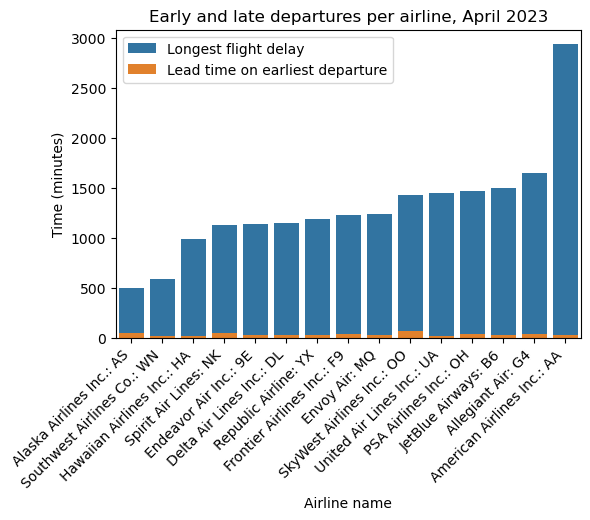

In [ ]:
# Flight delays and early arrivals
plt.figure(figsize=(6, 4))
plt.title("Early and late departures per airline, April 2023")
plt.xlabel("Airline name")
plt.ylabel("Time (minutes)")
sns.barplot(Q1_output, x="Airline name", y="Max delay", label="Longest flight delay")
sns.barplot(Q2_output, x="Airline name", y="Max early departure", label="Lead time on earliest departure")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

<p>Within the month of April, American Airlines had the single longest flight delay, while Alaska Airlines had the shortest. Alaska Airlines also had one of the longest lead times, though there does not seem to be a negative correlation between delay length and early departures. American Airlines is the largest airline provider in the world, and tends towards more consumer-friendly options. However, complaints from consumers about delays and poor customer service are common in the press. 

[In 2025, American Airlines had an on-time arrival rate of just 71.86%.](https://www.kiplinger.com/personal-finance/travel/the-best-and-worst-airlines-for-flight-delays-and-cancelations#:~:text=American:%20With%20an%20on%2Dtime%20performance%20of%2071.86%25,also%20historically%20had%20subpar%20on%2Dtime%20performance%20stats)</p>

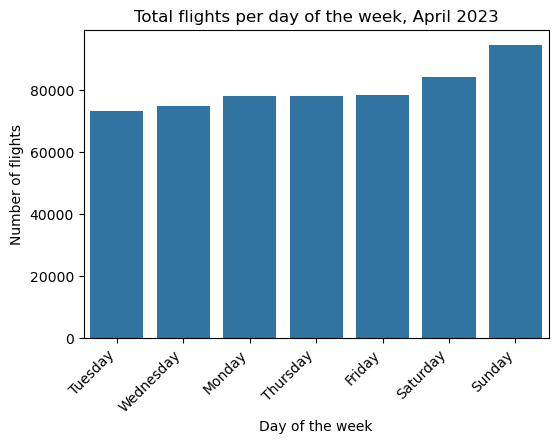

In [30]:
# Total flights per day of the week
plt.figure(figsize=(6, 4))
plt.title("Total flights per day of the week, April 2023")
plt.xlabel("Day of the week")
plt.ylabel("Number of flights")
sns.barplot(Q3_output, x="Day.1", y="Flights")
plt.xticks(rotation=45, ha='right')
plt.show()


<p>The slowest days for travel included Tuesday and Wednesdays, while the busiest included Saturdays and Sundays. Mondays, Thursdays, and Fridays had nearly identical flight counts. 

[Mondays and Fridays are common commuting dates for business travelers, and weekends are popular among leisure travelers. However, Tuesday and Wednesday flights tend to be cheaper, as demand for tickets falls.](https://www.travelplannersinternational.com/travel-agency-blog/travel/best-worst-times-to-fly/)

</p>

(array([ 8, 15, 22, 29]),
 [Text(8, 0, '2023-04-09'),
  Text(15, 0, '2023-04-16'),
  Text(22, 0, '2023-04-23'),
  Text(29, 0, '2023-04-30')])

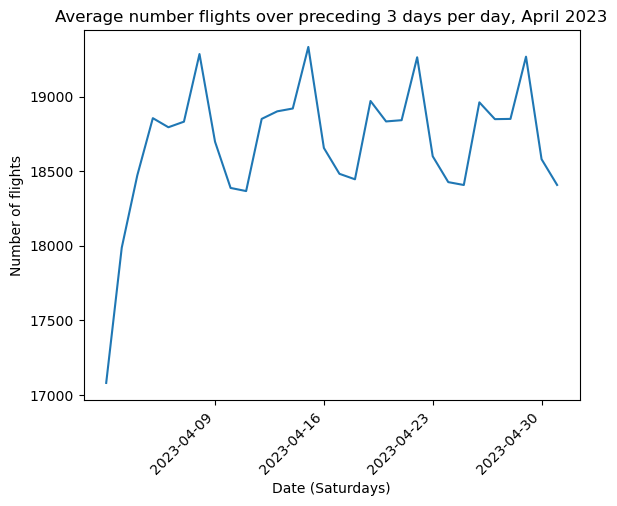

In [65]:
ax=sns.lineplot(data=Q7_output, x="Flight date", y="Average number of flights over past 3 days")
ax.set_xticks(np.arange(8, len(Q7_output), 7))
plt.title("Average number flights over preceding 3 days per day, April 2023")
plt.ylabel("Number of flights")
plt.xlabel("Date (Saturdays)")
plt.xticks(rotation=45, ha='right')

<p>The graph above represents the average number of flights per day, calculated by finding the average of the previous flight counts of the past 3 days. The x-axis is formatted to just display Sundays. Observe that on weekends, the average shoots up significantly, while during the middle of the week, the average drops significantly. This plot suggests that the density of flights per day of the week (represented in the bar graph above) changes on a steady weekly period.

### **Flight delays by airport**

<p>The Santa Maria Public Airport had the highest average flight delay among all the airports in the dataset.</p>

In [31]:
display(Q4_output)

,Name,Code,Delay
0,"Santa Maria, CA: Santa Maria Public/Capt. G. A...",14905,179.4444


In [42]:
Q5_output = Q5_output.sort_values(by="Delay")
display(Q5_output)


,Airline Name,Airport Name,Delay
0,NaN,NaN,0.0000
1,Southwest Airlines Co.: WN,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",25.3298
5,Alaska Airlines Inc.: AS,"Tampa, FL: Tampa International",26.7969
10,PSA Airlines Inc.: OH,"Fort Myers, FL: Southwest Florida International",35.6000
11,Envoy Air: MQ,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",51.2500
13,Spirit Air Lines: NK,"Latrobe, PA: Arnold Palmer Regional",54.5667
8,Endeavor Air Inc.: 9E,"Gainesville, FL: Gainesville Regional",62.0000
14,Frontier Airlines Inc.: F9,"St. Louis, MO: St Louis Lambert International",67.4086
6,United Air Lines Inc.: UA,"Aguadilla, PR: Rafael Hernandez",76.0000
4,American Airlines Inc.: AA,"Eugene, OR: Mahlon Sweet Field",83.9333


<p>Curiously, no two airport/airline pairs shared an airport for highest average delay times. However, three airports from Texas appeared among the six highest average delays, with the highest being El Paso International with an average of delay of 237.38 minutes. The three shortest delays belonged to three airports in Florida, being Fort Lauderdale, Tampa International, and Southwest Florida International (this does not mean that Florida has lower than average delay times -- it's still on the list three times!).

The reasons for this are unclear. However, during the Winter and early Spring, airports in Texas tend to experience greater than average delays due to inclimate weather when compared to other states. [Similarly, Florida also experiences frequent bouts of extreme weather, which could contribute to delays.](https://www.fox35orlando.com/news/weather-rocket-launches-and-more-visitors-affecting-flight-delays)

[The state of Texas is particularly unprepared when it comes to extreme winter weather due to underinvestment and the relative infrequency of winter storms.](https://www.texastribune.org/2023/02/03/texas-ice-storm-emergency-preparedness/#:~:text=Texas%20has%20not%20been%20prepared%20for%20winter,is%20more%20difficult%20and%20challenging%20*%20**Maintenance**)</p>

### **Flight cancellations**

,count(*)
0,9589


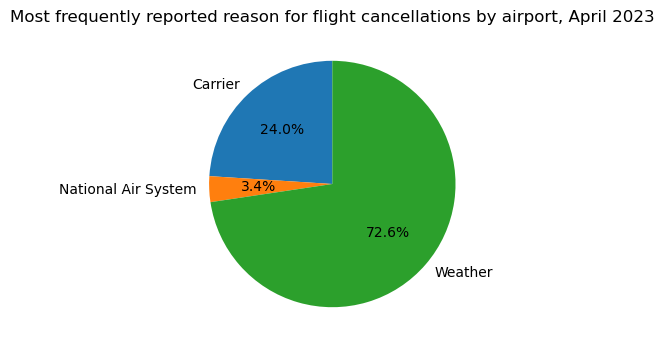

In [50]:
display(Q6A_output)

reason_counts = Q6B_output.groupby('Reason')['Number of Occurrences'].sum()

plt.figure(figsize=(6, 4))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Most frequently reported reason for flight cancellations by airport, April 2023")
plt.show()


<p>Within the month of April, 2023, there were around 9,600 flight cancellations. For 72.6% of airports, the single greatest contributor to flight cancellations tended to be inclimate weather conditions, as seen above in the pie chart. This lends support to the conclusion from the previous section, which cites extreme weather as a major contributor to flight delays and cancellations.</p>

**In conclusion, the frequency of flights tends to follow a predictable, weekly period, with more flights occurring on weenends and days adjacent to the weekend. However, the reliability of a given location's flight schedule will depend on region and external factors, such as carrier and weather conditions. American Airlines seems to have concerningly extreme flight delays, and airports located in the American South might experience more frequent delays due to unpredictable seasonal weather patterns.**

The SQL queries used to extract the data are listed below:

In [3]:
#1 
select Reporting_Airline as "Airline name", max(DepDelay) as "Max delay"
from al_perf
group by Reporting_Airline
order by "Max delay" desc;

#2
select Reporting_Airline as "Airline name", min(DepDelay) as "Max early departure"
from al_perf
group by Reporting_Airline
order by "Max early departure" desc;

#3 
with flights_day (Day, Flights) as (
select DayOfWeek, count(*)
from al_perf
group by DayOfWeek) 
select flights_day.Day, flights_day.Flights, L_WEEKDAYS.Day, rank() over (order by flights_day.Flights desc) as FlightRank
from flights_day left join L_WEEKDAYS on flights_day.Day = L_WEEKDAYS.Code 
group by flights_day.Day
order by flights_day.Flights asc;

select *
from al_perf;

#4 
with MaxAvgDeptDelay (Name, Code, Delay) as (
select L_AIRPORT_ID.Name, OriginAirportID, avg(DepDelay)
from al_perf left join L_AIRPORT_ID on L_AIRPORT_ID.ID = OriginAirportID
group by L_AIRPORT_ID.Name, OriginAirportID)
select *
from MaxAvgDeptDelay
where Delay = (select max(Delay) from MaxAvgDeptDelay);

#5
With MaxDelays as (
select L_AIRLINE_ID.Name as AirlineName,
L_AIRPORT_ID.Name as AirportName, 
DOT_ID_Reporting_Airline, OriginAirportID, 
avg(DepDelay) as AirportAvgDelay
from al_perf 
left join L_AIRLINE_ID on al_perf.DOT_ID_Reporting_Airline = L_AIRLINE_ID.ID 
left join L_AIRPORT_ID on al_perf.OriginAirportID = L_AIRPORT_ID.ID
group by DOT_ID_Reporting_Airline, OriginAirportID)
select MaxDelays.AirlineName as "Airline Name", 
MaxDelays.AirportName as "Airport Name", 
MaxDelays.AirportAvgDelay as "Delay"
from MaxDelays
where AirportAvgDelay = (
select max(AirportAvgDelay)
    from MaxDelays as MD
    where MD.DOT_ID_Reporting_Airline = MaxDelays.DOT_ID_Reporting_Airline
);

#6a
select count(*)
from al_perf
where Cancelled = 1;

#6b
with CancelCounts as (
select OriginAirportID, CancellationCode, count(CancellationCode) as ReasonCounts
from al_perf
where Cancelled = 1
group by OriginAirportID, CancellationCode)
select L_AIRPORT_ID.Name, L_CANCELATION.Reason, CancelCounts.ReasonCounts as "Number of Occurrences"
from CancelCounts 
left join L_AIRPORT_ID on CancelCounts.OriginAirportID = L_AIRPORT_ID.ID
left join L_CANCELATION on CancelCounts.CancellationCode = L_CANCELATION.Code
where ReasonCounts = (
select max(ReasonCounts)
from CancelCounts as CC
where CancelCounts.OriginAirportID = CC.OriginAirportID);

#7
select FlightDate as "Flight date", avg(count(*)) over (order by FlightDate rows between 3 preceding and 1 preceding) as "Average number of flights over past 3 days" 
from al_perf
group by FlightDate;

SyntaxError: invalid syntax (2634173850.py, line 2)